<a href="https://colab.research.google.com/github/EkaterinaVoloshenko/Wine-Quality/blob/main/1_0_eav_wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8, 6

In [42]:
data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# **Описание переменных**
1. fixed acidity: фиксированная кислотность
2. volatile acidity: летучая кислотность
3. citric acid: лимонная кислота
4. residual sugar: остаточный сахар
5. chlorides: хлориды
6. free sulfur dioxide: свободный диоксид серы
7. total sulfur dioxide: общий диоксид серы
8. density: плотность
9. pH: водородный показатель
10. sulphates: сульфаты
11. alcohol: алкоголь
12. quality (score between 0 and 10): качество (оценка от 0 до 10) - Выходная переменная (на основе сенсорных данных)

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Выбросы значений наблюдаются для значений остаточного сахара (residual sugar) и свободного диоксида серы (free sulfur dioxide).

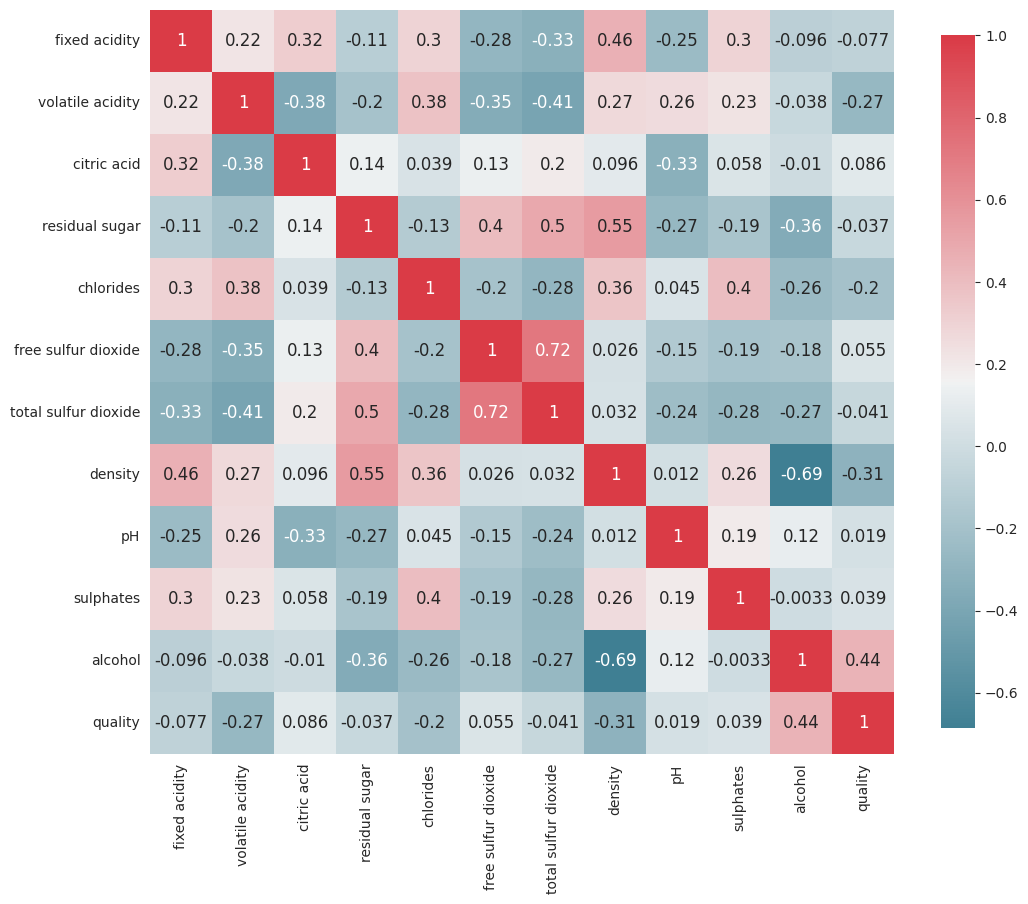

In [ ]:
corr = data.corr()
_, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(
    corr,
    cmap=cmap,
    square=True,
    cbar_kws = {'shrink':.9},
    ax=ax,
    annot=True,
    annot_kws={'fontsize':12}
)

Тепловая карта корреляции показывает наиболее сильную взаимосвязь между качеством вина и содержанием алкоголя.

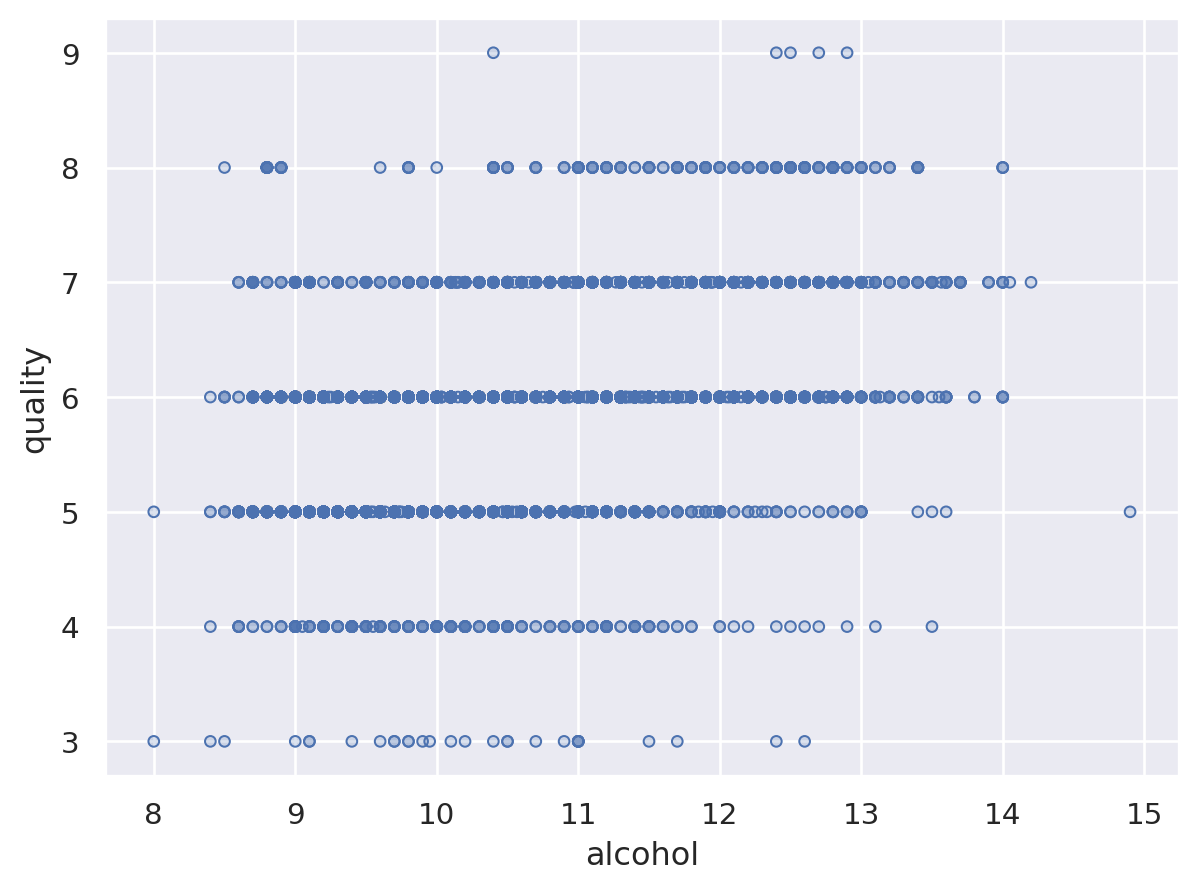

In [ ]:
import seaborn.objects as so
so.Plot(data, "alcohol", "quality").add(so.Dots())

## **Заполнение пропущенных значений в переменных**

In [43]:
imp_data = pd.DataFrame()

In [44]:
imp_data['fixed acidity'] = data['fixed acidity'].fillna(data['fixed acidity'].mean())
imp_data['volatile acidity'] = data['volatile acidity'].fillna(data['volatile acidity'].mean())
imp_data['citric acid'] = data['citric acid'].fillna(data['citric acid'].mean())
imp_data['residual sugar'] = data['residual sugar'].fillna(data['residual sugar'].mean())
imp_data['chlorides'] = data['chlorides'].fillna(data['chlorides'].mean())
imp_data['pH'] = data['pH'].fillna(data['pH'].mean())
imp_data['sulphates'] = data['sulphates'].fillna(data['sulphates'].mean())

In [5]:
imp_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,pH,sulphates
0,7.0,0.27,0.36,20.7,0.045,3.00,0.45
1,6.3,0.30,0.34,1.6,0.049,3.30,0.49
2,8.1,0.28,0.40,6.9,0.050,3.26,0.44
3,7.2,0.23,0.32,8.5,0.058,3.19,0.40
4,7.2,0.23,0.32,8.5,0.058,3.19,0.40


In [45]:
full_data = imp_data.join(data[['free sulfur dioxide', 'total sulfur dioxide', 'density', 'alcohol', 'quality']])
full_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,pH,sulphates,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,3.00,0.45,45.0,170.0,1.0010,8.8,6
1,6.3,0.30,0.34,1.6,0.049,3.30,0.49,14.0,132.0,0.9940,9.5,6
2,8.1,0.28,0.40,6.9,0.050,3.26,0.44,30.0,97.0,0.9951,10.1,6
3,7.2,0.23,0.32,8.5,0.058,3.19,0.40,47.0,186.0,0.9956,9.9,6
4,7.2,0.23,0.32,8.5,0.058,3.19,0.40,47.0,186.0,0.9956,9.9,6


In [46]:
X = full_data.drop('quality', axis=1)

In [47]:
y = full_data.quality

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Оценка важности признаков**

In [49]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

1.0


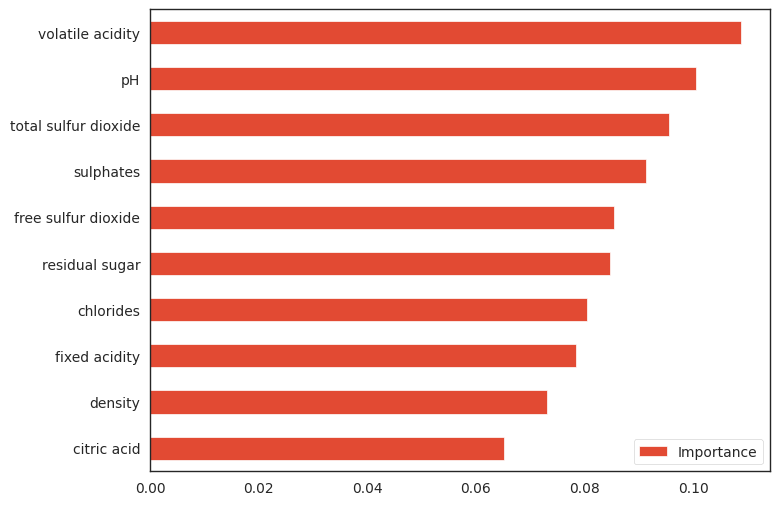

In [23]:
impns = pd.DataFrame(
    tree.feature_importances_,
    columns = ['Importance'],
    index = X_train.columns
)
impns = impns.sort_values(['Importance'], ascending=True)
impns[:10].plot(kind='barh')
print(tree.score(X_train, y_train))

# **Моделирование**

In [57]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
X_train=scaling.fit_transform(X_train)
X_test=scaling.fit_transform(X_test)

In [58]:
model = LogisticRegression()

In [59]:
model.fit(X_train, y_train)

LogisticRegression()

**Оценка модели**

In [60]:
print(model.score(X_train, y_train), model.score(X_test, y_test))

0.5495478160477199 0.536923076923077


# **Развертывание**

In [ ]:
y_test = model.predict(X_test)